In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import random
import sklearn as sk
from time import time
import pickle

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from rand_pert import rand_pertub
from rand_pert import link_mirage
from utils import calc_cc, calc_dist, calc_emd, number_of_fake_edges

In [6]:
# Generate a random graph
g = nx.erdos_renyi_graph(n=1000, p=0.1)

In [ ]:
# Read graph 

In [3]:
face_orig = open("data/facebook-links.txt") 
f_arr = np.array(face_orig.readlines())
G = nx.Graph()

edgelist = []
for line in f_arr: 
    i, j, time = line.split('\t')
    edgelist.append((int(i), int(j)))

G.add_edges_from(edgelist)

### Split the graph

In [7]:
from attack import *

In [8]:
alpha = 0.25

In [9]:
%%time
G1, G2 = edge_split(g, alpha)

CPU times: user 336 ms, sys: 20 ms, total: 356 ms
Wall time: 338 ms


In [10]:
M = 10
t = 4

In [12]:
%%time
for t in range(2,10):
    G_aux = link_mirage(G1, M, t)
    G_san = link_mirage(G2, M, t)

    print("Originial edges ", G1.number_of_edges(), " Now edges ", G_aux.number_of_edges())

    print("% of fake edges")
    print(number_of_fake_edges(G1, G_aux))
    print(number_of_fake_edges(G2, G_san))

    print("% of distortion")
    print(calc_dist(G1, G_aux))
    print(calc_dist(G2, G_san))
    
    print(" EMD of deg distibution")
    print(calc_emd(G1, G_aux))
    print(calc_emd(G2, G_san))
    
    print(" CC diff")
    print(calc_cc(G1, G_aux))
    print(calc_cc(G1, G_san))



('Originial edges ', 15516, ' Now edges ', 4571)
% of fake edges
0.702909647779
0.69587628866
% of distortion
1.20707656613
1.1825855797
 EMD of deg distibution
21.89
31.632
 CC diff
0.0899366499543
0.0506263887223
('Originial edges ', 15516, ' Now edges ', 4529)
% of fake edges
0.541620666814
0.569280343716
% of distortion
1.15809486981
1.14830706091
 EMD of deg distibution
21.974
31.712
 CC diff
0.0902046279979
0.0511223230089
('Originial edges ', 15516, ' Now edges ', 4582)
% of fake edges
0.703404626801
0.679633867277
% of distortion
1.20772106213
1.18006715791
 EMD of deg distibution
21.868
31.522
 CC diff
0.0944729361546
0.0513947432141
('Originial edges ', 15516, ' Now edges ', 4627)
% of fake edges
0.643397449751
0.654513584575
% of distortion
1.19186646043
1.17414420297
 EMD of deg distibution
21.7783071358
31.474
 CC diff
0.0936722206255
0.0499078782516
('Originial edges ', 15516, ' Now edges ', 4667)
% of fake edges
0.677523034069
0.691417378917
% of distortion
1.2037896365


In [19]:
X_naive, Y_naive = gen_trainset(G1, G2, alpha, "data/train_naive.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Aux finished 21.0361759663 sec
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
San finished 34.5330729485 sec


In [13]:
X, Y = gen_trainset(G_aux, G_san, alpha, "data/train.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Aux finished 0.99242401123 sec
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
San finished 1.15689778328 sec


In [14]:
%%time
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)

CPU times: user 2.17 s, sys: 68 ms, total: 2.24 s
Wall time: 1.42 s


In [15]:
X_t, Y_t = gen_testset(G_aux, G_san, "data/test_test.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Test set generated in  0.502485990524 sec


In [21]:
X_t_naive, Y_t_naive = gen_testset(G1, G2, "data/test_test_naive.dump")

Dataset is generating ... 
Start adding positive examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Start adding false examples
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Finished : 0
Test set generated in  299.437201023 sec


In [24]:
%%time

forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
print("Naive:")
forest.fit(X_naive, Y_naive)
print(forest.score(X_t_naive, Y_t_naive))

Anonymization
0.52027027027
Naive:
0.866073730343
CPU times: user 9.91 s, sys: 212 ms, total: 10.1 s
Wall time: 4.79 s


In [31]:
from sklearn.metrics import roc_curve, auc
y_score = forest.predict_proba(X_t_naive)
y_true = Y_t_naive
fpr, tpr, thresholds = roc_curve(y_true, y_score[:, 1])
roc_auc = auc(fpr, tpr)

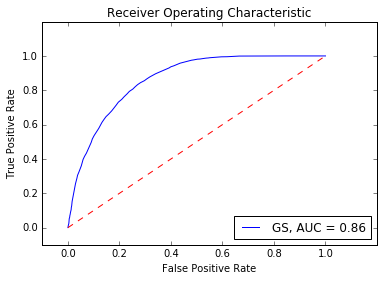

In [32]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
%%time
forest = RandomForestClassifier(n_estimators = 400, n_jobs=8)
forest.fit(X, Y)
print("Anonymization")
print(forest.score(X_t, Y_t))

Anonymization
0.510135135135


In [34]:
from sklearn.metrics import roc_curve, auc
y_score = forest.predict_proba(X_t)
y_true = Y_t
fpr, tpr, thresholds = roc_curve(y_true, y_score[:, 1])
roc_auc = auc(fpr, tpr)

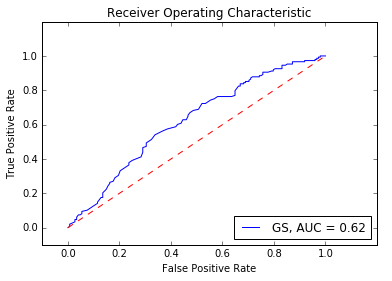

In [35]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='GS, AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()